In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as plt

%matplotlib inline

<h1 style="text-align: center;"> Microsoft Movie Studios Recommendations </h1>

<img style="display: block;
            margin-left: auto;
            margin-right: auto;
            width: 50%;"
     src="images/projector_img.jpg" />

#### Author: Tahron Herring

### Overview

<hr>

<p style="text-align: left;"> 
The technology giant, Microsoft is looking to expand it's lines of business by jumping into the movie business.  This project will analyze data from various movie tracking and rating companies to help them determine how to best direct project investments that help ensure a successful start to this venture. 
</p>

### Business Understanding

<img src="images/reels_img.jpg"
     width=750
     height=150
     />

<hr>

<p style="text-align: left;"> 
Like every successful business Microsoft wants to make the best decisions that they can with the resources that they decide to dedicate to a particular new venture. With this in mind, we want to analyze the peformance of past and current films in order to guide what areas Microsoft should make it's initial movie investments. 
</p>

<p style="text-align: left;"> 
A good way of determining which films have performed the best at the box office is to look at two important metrics, a films popularity and a films profitability.  It may be suprising to many but measuring these two incators are not exactly straight forward. For the purposes of this project we will be using data from five different datasources to help us determine which film categories are the most popular and which are the most profitable.    
</p>   

### Data Understanding

<img src="images/movie_theater_1.jpg"
     width=500
     height=150
     />

<hr>

<p style="text-align: left;">
  
To assess film popularity and film profitability we will examine five seperate datasources. The datasets will come from Box Office Mojo, IMDB, Rotten Tomatoes, The Movie DB, and The Numbers. Based on the contents of the datasets popularity will be determined from the data housed in the IMDB, The Movie DB, and the Rotten Tomatoes datasources. These sources contain features like rating, popularity, genre, vote_count, etc. Profitability will be determined from the Box Office Mojo and The Numbers datasources. These sources contain features like domestic_gross and production_budget, etc.  
    
</p>    

In [2]:
# Setting the connection to the IMDB database 
conn = sqlite3.Connection("im.db")

#### IMDB Tables: Movie Ratings Table

<p style="text-align: left;">

</p> 

In [3]:
# From the IMDB database reading in the movies_ratings table
q0 ="""
SELECT *
FROM movie_ratings

"""
movie_ratings_df = pd.read_sql(q0, conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### IMDB Tables: Movie Basics Table

<p style="text-align: left;">

</p> 

In [4]:
# From the IMDB database reading in the movies_basics table
q1 ="""
SELECT *
FROM movie_basics

"""
movie_basics_df = pd.read_sql(q1, conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Box Office Mojo Data

<p style="text-align: left;">

</p> 

In [5]:
# Reading in the Box Office Mojo csv file
bom_df = pd.read_csv('data/bom.movie_gross.csv.gz')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### The Movie Database Data

<p style="text-align: left;">

</p> 

In [6]:
# Reading in The Movie Database csv file
tmdb_df = pd.read_csv('data/tmdb.movies.csv.gz')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### The Numbers Data

<p style="text-align: left;">

</p> 

In [7]:
# Reading in The Numbers csv file
tn_df = pd.read_csv('data/tn.movie_budgets.csv.gz')
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Rotten Tomatoes: Movie Info Data

<p style="text-align: left;">

</p> 

In [8]:
# Reading in the Rotten Tomatoes movie_info tsv file
rt_mov_info_df = pd.read_csv('data/rt.movie_info.tsv.gz', delimiter='\t')
rt_mov_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


#### Rotten Tomatoes: Reviews Data

<p style="text-align: left;">

</p> 

In [9]:
# Reading in the Rotten Tomatoes reviews tsv file
rt_rev_df = pd.read_csv('data/rt.reviews.tsv.gz', delimiter='\t', encoding='ISO-8859-1')
rt_rev_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


### Data Preparation

<hr>

<p style="text-align: left;">
In order to prepare the data for analysis we'll need to first look at the data sources that contain more than one data item, the IMDB data and the Rotten Tomatoes data. We'll merge the data from these sources so that we are using one set of data from each data source, droping data features that are not needed for our analytical purposes. Once we have one data item from each source with the needed data features, we'll work on cleaning up the data itself to make analysis run smoother.
</p> 

In [10]:
# Combining the IMDB tables, discarding the unnecessary features
q2 ="""
SELECT movie_id, averagerating, numvotes, primary_title, genres
FROM movie_ratings
JOIN movie_basics USING(movie_id)
ORDER BY numvotes DESC
"""
imdb_df = pd.read_sql(q2, conn)
imdb_df.head()

,movie_id,averagerating,numvotes,primary_title,genres
0,tt1375666,8.8,1841066,Inception,"Action,Adventure,Sci-Fi"
1,tt1345836,8.4,1387769,The Dark Knight Rises,"Action,Thriller"
2,tt0816692,8.6,1299334,Interstellar,"Adventure,Drama,Sci-Fi"
3,tt1853728,8.4,1211405,Django Unchained,"Drama,Western"
4,tt0848228,8.1,1183655,The Avengers,"Action,Adventure,Sci-Fi"


In [11]:
#Adding a new feature to the IMDB dataframe named rating score 
imdb_df['rating_score'] = imdb_df['averagerating'] * imdb_df['numvotes']
imdb_df.head()

,movie_id,averagerating,numvotes,primary_title,genres,rating_score
0,tt1375666,8.8,1841066,Inception,"Action,Adventure,Sci-Fi",16201380.8
1,tt1345836,8.4,1387769,The Dark Knight Rises,"Action,Thriller",11657259.6
2,tt0816692,8.6,1299334,Interstellar,"Adventure,Drama,Sci-Fi",11174272.4
3,tt1853728,8.4,1211405,Django Unchained,"Drama,Western",10175802.0
4,tt0848228,8.1,1183655,The Avengers,"Action,Adventure,Sci-Fi",9587605.5


In [12]:
# Combining the Rotten Tomatoes dataframes
rt_data_df = pd.merge(rt_mov_info_df, rt_rev_df, on='id')
rt_data_df.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [13]:
# Filtering out the columns from the Rotten Tomatoes data that are not needed for our analysis
rt_data_df = rt_data_df[['id', 'genre', 'fresh']]
rt_data_df.head()

,id,genre,fresh
0,3,Drama|Science Fiction and Fantasy,fresh
1,3,Drama|Science Fiction and Fantasy,rotten
2,3,Drama|Science Fiction and Fantasy,fresh
3,3,Drama|Science Fiction and Fantasy,fresh
4,3,Drama|Science Fiction and Fantasy,fresh


In [14]:
# Filtering out the columns from the Box Office Mojo data that are not needed for our analysis
bom_df = bom_df[['title', 'domestic_gross', 'foreign_gross']]
bom_df.head()

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000
1,Alice in Wonderland (2010),334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000
3,Inception,292600000.0,535700000
4,Shrek Forever After,238700000.0,513900000


In [15]:
#Need to change all the foreign_gross entries to type float

#copying foreign_gross values
for_gross_values = bom_df['foreign_gross'].values

#holder variable that will hold the converted float values 
conv_flt_vales = []

#variable used in loop that is needed for string strip function 
que_var = ' '

#loop where every foreign_gross value is either added to the holder variable if it is 
#a float or if it is a string the comma will be removed before it is converted
for x in for_gross_values:
    if type(x) == float:
        conv_flt_vales.append(x)
    elif type(x) == str:
        que_var = x.replace(',', '')
        conv_flt_vales.append(float(que_var))

#assigning the converted foreign_gross values back to the Box Office Mojo dataframe
bom_df['foreign_gross'] = conv_flt_vales

bom_df.head()


,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000.0
1,Alice in Wonderland (2010),334200000.0,691300000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0
3,Inception,292600000.0,535700000.0
4,Shrek Forever After,238700000.0,513900000.0


In [16]:
#Now that the foreign_gross feature has been converted the world_wide_gross field can be created
bom_df['world_wide_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']
bom_df.head()

,title,domestic_gross,foreign_gross,world_wide_gross
0,Toy Story 3,415000000.0,652000000.0,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,9.603000e+08
3,Inception,292600000.0,535700000.0,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,7.526000e+08


In [17]:
# Filtering out the columns from The Movie DB data that are not needed for our analysis
tmdb_df = tmdb_df[['genre_ids', 'popularity', 'title', 'vote_average', 'vote_count']]
tmdb_df.head()

,genre_ids,popularity,title,vote_average,vote_count
0,"[12, 14, 10751]",33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",28.734,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",28.515,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",28.005,Toy Story,7.9,10174
4,"[28, 878, 12]",27.920,Inception,8.3,22186


In [18]:
# Filtering out the columns from The Numbers data that are not needed for our analysis
tn_df = tn_df[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross']]
tn_df.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [19]:
#Need to change all the production_budget entries to type int

#copying production_budget values
prod_bud_values = tn_df['production_budget'].values

#holder variable that will hold the converted values 
conv_vales = []

#variable used in loop that is needed for string strip function 
que_var = ' '

#loop where every production_budget value is either added to the holder variable if it is 
#a float or int. If it is a string first the comma will be removed, after that the $ will
#be removed before it is converted

#removing the ',' character
for x in prod_bud_values:
    if type(x) == float:
        conv_vales.append(int(x))
    elif type(x) == int:
        conv_vales.append(x)
    elif type(x) == str:
        que_var = x.replace(',', '')
        conv_vales.append(que_var)        

#reseting holder and strip variables
prod_bud_values = conv_vales
conv_vales = []
que_var = ' '
        
#removing the '$' character
for x in prod_bud_values:
    if type(x) == float:
        conv_vales.append(int(x))
    elif type(x) == int:
        conv_vales.append(x)
    elif type(x) == str:
        que_var = x.replace('$', '')
        conv_vales.append(int(que_var))

#assigning the converted production_budget values back to The Numbers dataframe
tn_df['production_budget'] = conv_vales

tn_df.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,"$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875"
2,Dark Phoenix,350000000,"$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747"


In [20]:
#Need to change all the worldwide_gross entries to type int

#copying worldwide_gross values
ww_gr_values = tn_df['worldwide_gross'].values

#holder variable that will hold the converted values 
conv_vales = []

#variable used in loop that is needed for string strip function 
que_var = ' '

#loop where every worldwide_gross value is either added to the holder variable if it is 
#a float or int. If it is a string first the comma will be removed, after that the $ will
#be removed before it is converted

#removing the ',' character
for x in ww_gr_values:
    if type(x) == float:
        conv_vales.append(int(x))
    elif type(x) == int:
        conv_vales.append(x)
    elif type(x) == str:
        que_var = x.replace(',', '')
        conv_vales.append(que_var)        

#reseting holder and strip variables
ww_gr_values = conv_vales
conv_vales = []
que_var = ' '
        
#removing the '$' character
for x in ww_gr_values:
    if type(x) == float:
        conv_vales.append(int(x))
    elif type(x) == int:
        conv_vales.append(x)
    elif type(x) == str:
        que_var = x.replace('$', '')
        conv_vales.append(int(que_var))

#assigning the converted production_budget values back to The Numbers dataframe
tn_df['worldwide_gross'] = conv_vales

tn_df.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,"$760,507,625",2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875
2,Dark Phoenix,350000000,"$42,762,350",149762350
3,Avengers: Age of Ultron,330600000,"$459,005,868",1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747


### Data Analysis

<hr>

<p style="text-align: left;">
The recomendations that we make to Microsoft will be based on our analysis of movie popularity and movie profitability. 
</p> 

#### Popularity: The Movie Database Insights

<p style="text-align: left;">

</p> 

<p style="text-align: left;">
One Assumption that we will use is that the more popular movies will have a higher number of people voting on them. 
</p> 

In [21]:
#Inspecting the statistical dimentions of The Movie Database data
tmdb_df.describe()

,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000
mean,3.130912,5.991281,194.224837
std,4.355229,1.852946,960.961095
min,0.600000,0.000000,1.000000
25%,0.600000,5.000000,2.000000
50%,1.374000,6.000000,5.000000
75%,3.694000,7.000000,28.000000
max,80.773000,10.000000,22186.000000


<p style="text-align: left;">
Looking at the statistics of the data we see that the average number of votes is 194. Therefore we will limit our dataset to records with more than 194 votes. Subsequently we will sort the results and use the top 5 most popular genres. 
</p> 

In [22]:
#Filtering the data based on vote count
tmdb_df = tmdb_df.loc[tmdb_df['vote_count'] > 194]

In [23]:
#Sorting the data in decending order and taking the top 5 results
tmdb_df = tmdb_df.sort_values(by=['popularity', 'vote_average'], ascending=False).head()
tmdb_df

,genre_ids,popularity,title,vote_average,vote_count
23811,"[12, 28, 14]",80.773,Avengers: Infinity War,8.3,13948
11019,"[28, 53]",78.123,John Wick,7.2,10081
23812,"[28, 12, 16, 878, 35]",60.534,Spider-Man: Into the Spider-Verse,8.4,4048
11020,"[28, 12, 14]",53.783,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,"[878, 28, 12]",50.289,The Avengers,7.6,19673


In [24]:
#Creating the genre feature based on the genre_ids column
#Setting the genres for the top entries
a = 'Adventure, Action, Fantasy'
b = 'Action, Thriller'
c = 'Action, Adventure, Animation, Sci-Fi, Comedy'
d = 'Action, Adventure, Fantasy'
e = 'Sci-Fi, Action, Adventure'

#Creating the genres list
genres = [a, b, c, d, e]

#Assigning the genres list to the genres feature in The Numbers dataframe
tmdb_df['genres'] = genres

tmdb_df

,genre_ids,popularity,title,vote_average,vote_count,genres
23811,"[12, 28, 14]",80.773,Avengers: Infinity War,8.3,13948,"Adventure, Action, Fantasy"
11019,"[28, 53]",78.123,John Wick,7.2,10081,"Action, Thriller"
23812,"[28, 12, 16, 878, 35]",60.534,Spider-Man: Into the Spider-Verse,8.4,4048,"Action, Adventure, Animation, Sci-Fi, Comedy"
11020,"[28, 12, 14]",53.783,The Hobbit: The Battle of the Five Armies,7.3,8392,"Action, Adventure, Fantasy"
5179,"[878, 28, 12]",50.289,The Avengers,7.6,19673,"Sci-Fi, Action, Adventure"


<AxesSubplot:xlabel='popularity', ylabel='genres'>

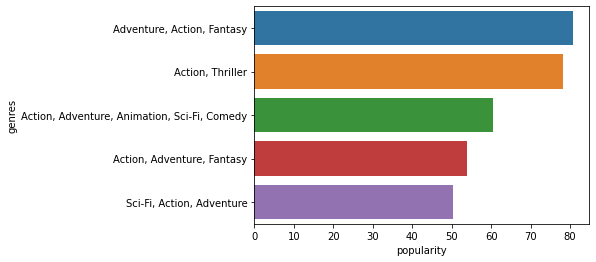

In [25]:
#Ploting the top 5 movie categories based on popularity
sns.barplot(data=tmdb_df, y='genres', x='popularity')

#### Popularity: IMDB Insights

<p style="text-align: left;">

</p> 

<p style="text-align: left;">
Keeping the same assumptions used for the Movie Database analysis we'll now analyze the IMDB data. 
The key difference here is that there is no popularity feature for us to use.  Therefore popularity
 will be determined by inspecting the average rating of the movies that have more than an average 
amout of rating votes. 
</p> 

In [26]:
#Inspecting the statistical dimentions of the IMDB data
imdb_df.describe()

,averagerating,numvotes,rating_score
count,73856.000000,7.385600e+04,7.385600e+04
mean,6.332729,3.523662e+03,2.430179e+04
std,1.474978,3.029402e+04,2.293627e+05
min,1.000000,5.000000e+00,5.000000e+00
25%,5.500000,1.400000e+01,9.100000e+01
50%,6.500000,4.900000e+01,3.024000e+02
75%,7.400000,2.820000e+02,1.573950e+03
max,10.000000,1.841066e+06,1.620138e+07


In [27]:
#Filtering the data based on vote count
imdb_df = imdb_df.loc[imdb_df['numvotes'] > 3524]

In [28]:
#Sorting the data in decending order and taking the top 5 results
imdb_df = imdb_df.sort_values(by=['rating_score'], ascending=False).head()
imdb_df

,movie_id,averagerating,numvotes,primary_title,genres,rating_score
0,tt1375666,8.8,1841066,Inception,"Action,Adventure,Sci-Fi",16201380.8
1,tt1345836,8.4,1387769,The Dark Knight Rises,"Action,Thriller",11657259.6
2,tt0816692,8.6,1299334,Interstellar,"Adventure,Drama,Sci-Fi",11174272.4
3,tt1853728,8.4,1211405,Django Unchained,"Drama,Western",10175802.0
4,tt0848228,8.1,1183655,The Avengers,"Action,Adventure,Sci-Fi",9587605.5


<AxesSubplot:xlabel='rating_score', ylabel='genres'>

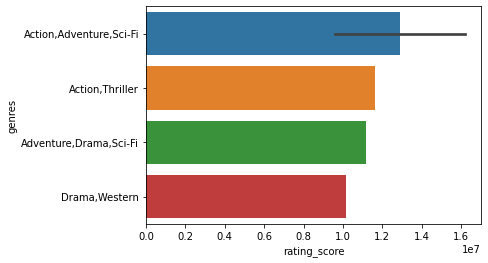

In [29]:
#Ploting the top 5 movie categories based on popularity
sns.barplot(data=imdb_df, y='genres', x='rating_score')

#### Popularity: Rotten Tomatoes Insights

<p style="text-align: left;">

</p> 

<p style="text-align: left;">
To analyze the Rotten Tomatoes data we'll use a slightly different approach because the data is structured a little differently. First the Rotten Tomatoes rating system rates movies negatively with a "rotten" rating and a positive rating is denoted by "fresh". The negative ratings will need to be filtered out and then the positive ratings can be counted and sorted.
</p> 

In [30]:
#Filtering out the data with the "rotten" rating
rt_data_df = rt_data_df.loc[rt_data_df['fresh'] == 'fresh']

In [31]:
#Grouping the data by genre and fresh rating
rt_data_df = rt_data_df[['genre', 'fresh', 'id']].groupby(['genre', 'fresh']).count()

In [32]:
#Sorting the data in decending order and taking the top 5 results
rt_data_df = rt_data_df.sort_values(by=['id'], ascending=False).head()
rt_data_df

,,id
genre,fresh,
Drama,fresh,4969
Comedy|Drama,fresh,2953
Comedy,fresh,1950
Drama|Mystery and Suspense,fresh,1780
Drama|Romance,fresh,1174


#### Profitability: Box Office Mojo Insights

<p style="text-align: left;">

</p> 

<p style="text-align: left;">
For the Box Office Mojo dataset we only have data on what a film has produced.  There is no feature which speaks to the production cost or other cost.  Therefore, when looking at this dataset our profitablility analysis will be limited to a degree and will be determined by which film has produced the most.  The Box Office Mojo dataset also lacks any categorical information which is the main deliverable for this project. Therefore, we will have to do a lookup on the IMDB dataset to find the categories from our analysis. 
</p> 

In [33]:
#Sorting the data in decending order and taking the top 5 results
bom_df = bom_df.sort_values(by=['world_wide_gross'], ascending=False).head()
bom_df

,title,domestic_gross,foreign_gross,world_wide_gross
727,Marvel's The Avengers,623400000.0,895500000.0,1.518900e+09
1875,Avengers: Age of Ultron,459000000.0,946400000.0,1.405400e+09
3080,Black Panther,700100000.0,646900000.0,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,381000000.0,960500000.0,1.341500e+09
2758,Star Wars: The Last Jedi,620200000.0,712400000.0,1.332600e+09


In [34]:
#Looking up and printing out the categories for the top grossing films from the Box Office Mojo data
a = movie_basics_df.loc[movie_basics_df['primary_title'] == 'The Avengers']['genres'].iloc[0]
b = movie_basics_df.loc[movie_basics_df['primary_title'] == 'Avengers: Age of Ultron']['genres'].iloc[0]
c = movie_basics_df.loc[movie_basics_df['primary_title'] == 'Black Panther']['genres'].iloc[0]
d = movie_basics_df.loc[movie_basics_df['primary_title'] == 'Harry Potter and the Deathly Hallows: Part 2']['genres'].iloc[0]
e = movie_basics_df.loc[movie_basics_df['primary_title'] == 'Star Wars: The Last Jedi']['genres'].iloc[0]

print("Movie category for Marvel's The Avengers is {}".format(a))
print("Movie category for Avengers: Age of Ultron is {}".format(b))
print("Movie category for Black Panther is {}".format(c))
print("Movie category for Harry Potter and the Deathly Hallows Part 2 is {}".format(d))
print("Movie category for Star Wars: The Last Jedi is {}".format(e))

Movie category for Marvel's The Avengers is Action,Adventure,Sci-Fi
Movie category for Avengers: Age of Ultron is Action,Adventure,Sci-Fi
Movie category for Black Panther is Action,Adventure,Sci-Fi
Movie category for Harry Potter and the Deathly Hallows Part 2 is Adventure,Drama,Fantasy
Movie category for Star Wars: The Last Jedi is Action,Adventure,Fantasy


In [35]:
#Creating a dataframe to plot Box Office Mojo findings with the genres that were lookedup

#Copying the top 5 grossing film results from the Box Office Mojo data
plot_bom_df = bom_df.sort_values(by=['world_wide_gross'], ascending=False).head()

#Setting the genres for the top entries
a = movie_basics_df.loc[movie_basics_df['primary_title'] == 'The Avengers']['genres'].iloc[0]
b = movie_basics_df.loc[movie_basics_df['primary_title'] == 'Avengers: Age of Ultron']['genres'].iloc[0]
c = movie_basics_df.loc[movie_basics_df['primary_title'] == 'Black Panther']['genres'].iloc[0]
d = movie_basics_df.loc[movie_basics_df['primary_title'] == 'Harry Potter and the Deathly Hallows: Part 2']['genres'].iloc[0]
e = movie_basics_df.loc[movie_basics_df['primary_title'] == 'Star Wars: The Last Jedi']['genres'].iloc[0]

#Creating the genres list
genres = [a, b, c, d, e]

#Assigning the genres list to the genres feature in The Numbers dataframe
plot_bom_df['genres'] = genres

plot_bom_df

,title,domestic_gross,foreign_gross,world_wide_gross,genres
727,Marvel's The Avengers,623400000.0,895500000.0,1.518900e+09,"Action,Adventure,Sci-Fi"
1875,Avengers: Age of Ultron,459000000.0,946400000.0,1.405400e+09,"Action,Adventure,Sci-Fi"
3080,Black Panther,700100000.0,646900000.0,1.347000e+09,"Action,Adventure,Sci-Fi"
328,Harry Potter and the Deathly Hallows Part 2,381000000.0,960500000.0,1.341500e+09,"Adventure,Drama,Fantasy"
2758,Star Wars: The Last Jedi,620200000.0,712400000.0,1.332600e+09,"Action,Adventure,Fantasy"


<AxesSubplot:xlabel='world_wide_gross', ylabel='genres'>

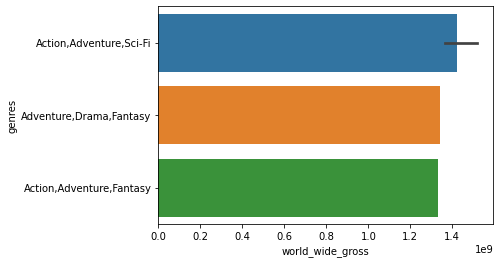

In [36]:
#Ploting the top 5 grossing film results categories
sns.barplot(data=plot_bom_df, y='genres', x='world_wide_gross')

#### Profitability: The Numbers Insights

<p style="text-align: left;">

</p>

<p style="text-align: left;">
To calculate the profitability for The Numbers dataset we'll use the gross profit margin formula. We have all of the needed features to calculate this type of profitabilty measure which we'll add to the dataframe and then sort the dataframe based on this new feature. After sorting we'll take the top 5 results and perform a lookup on the IMDB dataset to find the categories from our analysis as was done with the Box Office Mojo data. 
</p> 

In [37]:
#Creating the gross profit margin feature
tn_df['gross_prof_marg'] = (tn_df['worldwide_gross'] - tn_df['production_budget']) / tn_df['worldwide_gross']
tn_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,gross_prof_marg
0,Avatar,425000000,"$760,507,625",2776345279,0.846921
1,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,0.607331
2,Dark Phoenix,350000000,"$42,762,350",149762350,-1.337036
3,Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,0.764364
4,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,0.759251


In [38]:
tn_df.sort_values(by=['gross_prof_marg', 'worldwide_gross'], ascending=False).head(6)

,movie,production_budget,domestic_gross,worldwide_gross,gross_prof_marg
5745,Deep Throat,25000,"$45,000,000",45000000,0.999444
5613,Mad Max,200000,"$8,750,000",99750000,0.997995
5492,Paranormal Activity,450000,"$107,918,810",194183034,0.997683
5679,The Gallows,100000,"$22,764,410",41656474,0.997599
5406,The Blair Witch Project,600000,"$140,539,099",248300000,0.997584
5709,Super Size Me,65000,"$11,529,368",22233808,0.997077


In [39]:
#Looking up and printing out the categories for the most profitable films from The Numbers data
a = 'Action, Adventure, Sci-Fi, Thriller'
b = 'Horror, Mystery'
c = movie_basics_df.loc[movie_basics_df['primary_title'] == 'The Gallows']['genres'].iloc[0]
d = movie_basics_df.loc[movie_basics_df['primary_title'] == 'Blair Witch']['genres'].iloc[0]
e = 'Documentary'

print("Movie category for Mad Max is {}".format(a))
print("Movie category for Paranormal Activity is {}".format(b))
print("Movie category for The Gallows is {}".format(c))
print("Movie category for The Blair Witch Project is {}".format(d))
print("Movie category for Super Size Me is {}".format(e))

Movie category for Mad Max is Action, Adventure, Sci-Fi, Thriller
Movie category for Paranormal Activity is Horror, Mystery
Movie category for The Gallows is Horror,Mystery,Thriller
Movie category for The Blair Witch Project is Horror,Mystery,Thriller
Movie category for Super Size Me is Documentary


<p style="text-align: left;">
Notes on The Numbers profitable categories: First, some of the movies didn't show up in the IMDB database.  Therefore a manual lookup was performed.  Secondly, for the most profitable film(Deep Throat), not only was it not in the IMDB but we will be omitting this result from the recommendations.  The film is pornographic in nature and we will not be recommending those types of films to Microsoft.  
</p> 

In [40]:
#Creating a dataframe to plot The Numbers findings with the genres that were lookedup

#Copying the top 6 most profitable results from The Numbers data
plot_tn_df = tn_df.sort_values(by=['gross_prof_marg', 'worldwide_gross'], ascending=False).head(6)
#Discarding the top entry 'Deep Throat'
plot_tn_df = plot_tn_df[1:]

#Setting the genres for the top entries
a = 'Action, Adventure, Sci-Fi, Thriller'
b = 'Horror, Mystery'
c = movie_basics_df.loc[movie_basics_df['primary_title'] == 'The Gallows']['genres'].iloc[0]
d = movie_basics_df.loc[movie_basics_df['primary_title'] == 'Blair Witch']['genres'].iloc[0]
e = 'Documentary'

#Creating the genres list
genres = [a, b, c, d, e]

#Assigning the genres list to the genres feature in The Numbers dataframe
plot_tn_df['genres'] = genres

plot_tn_df


,movie,production_budget,domestic_gross,worldwide_gross,gross_prof_marg,genres
5613,Mad Max,200000,"$8,750,000",99750000,0.997995,"Action, Adventure, Sci-Fi, Thriller"
5492,Paranormal Activity,450000,"$107,918,810",194183034,0.997683,"Horror, Mystery"
5679,The Gallows,100000,"$22,764,410",41656474,0.997599,"Horror,Mystery,Thriller"
5406,The Blair Witch Project,600000,"$140,539,099",248300000,0.997584,"Horror,Mystery,Thriller"
5709,Super Size Me,65000,"$11,529,368",22233808,0.997077,Documentary


<AxesSubplot:xlabel='gross_prof_marg', ylabel='genres'>

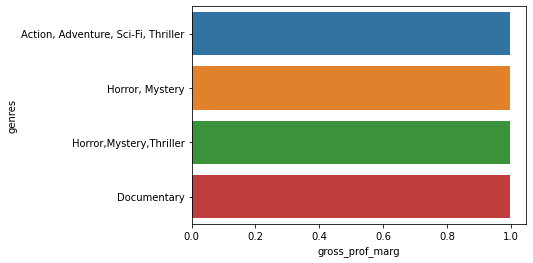

In [41]:
#Ploting the top 5 most profitable movie categories
sns.barplot(data=plot_tn_df, y='genres', x='gross_prof_marg')

#### Genre Analysis

<p style="text-align: left;">

</p>

<p style="text-align: left;">
The last step in our analysis process is to analyze the top genre results that we recieved from each of the datasources.  There are many different ways we could go about this, however the method that we have chosen to follow is to perform a word(genre) frequency breakdown.  The process will consist of breaking up the genre groups into the individual genres.  Once we have the individual genres, they will be counted and the genre with the highest frequency will be what we recommend. For example, if a movie is classified as a Action, Adventure, Sci-Fi film then each word(Action, Adventure, Sci-Fi) would get its count incresed by 1 as we continued through the other movie selections. 
</p> 

In [42]:
#Creating the genre lists from the results of the analysis done on the 5 seperate datasources
tmdb_genres = [
    'Adventure', 'Action', 'Fantasy',
    'Action', 'Thriller',
    'Action', 'Adventure', 'Animation', 'Sci-Fi', 'Comedy',
    'Action', 'Adventure', 'Fantasy',
    'Sci-Fi', 'Action', 'Adventure'
]

imdb_genres = [
    'Action', 'Adventure', 'Sci-Fi',
    'Action', 'Thriller',
    'Adventure', 'Drama', 'Sci-Fi', 
    'Drama', 'Western',
    'Action', 'Adventure', 'Sci-Fi'
]

rt_genres = [
    'Drama',
    'Comedy', 'Drama',
    'Comedy',  
    'Drama', 'Mystery', 'Suspense',
    'Drama', 'Romance'
]

bom_genres = [
    'Action', 'Adventure', 'Sci-Fi',
    'Action', 'Adventure', 'Sci-Fi',
    'Action', 'Adventure', 'Sci-Fi',  
    'Adventure', 'Drama', 'Fantasy',
    'Action', 'Adventure', 'Fantasy'
]

tn_genres = [
    'Action', 'Adventure', 'Sci-Fi', 'Thriller',
    'Horror', 'Mystery',
    'Horror', 'Mystery', 'Thriller',
    'Horror', 'Mystery', 'Thriller',
    'Documentary'
]

In [43]:
#Creating and initializing the popularity dictionary
pop_dict = {}

#Adding together the genres from the datasources that were used for the popularity 
#analysis(The Movie Database, the IMDB datasource, and the Rotten Tomatoes datasource)
pop_list = tmdb_genres + imdb_genres + rt_genres

#loop that intializes the dictionary with the genres from the genre list
for pop in pop_list:
    pop_dict.update({pop:0})
    
pop_dict

{'Adventure': 0,
 'Action': 0,
 'Fantasy': 0,
 'Thriller': 0,
 'Animation': 0,
 'Sci-Fi': 0,
 'Comedy': 0,
 'Drama': 0,
 'Western': 0,
 'Mystery': 0,
 'Suspense': 0,
 'Romance': 0}

In [44]:
#looping through the genre list and updating the popularity dictionary with the counts for each genre
for pl in pop_list:
    pop_dict[pl] += 1
    
pop_dict

{'Adventure': 7,
 'Action': 8,
 'Fantasy': 2,
 'Thriller': 2,
 'Animation': 1,
 'Sci-Fi': 5,
 'Comedy': 3,
 'Drama': 6,
 'Western': 1,
 'Mystery': 1,
 'Suspense': 1,
 'Romance': 1}

<p style="text-align: left;">
So, from our popularity analysis the most popular genre is Action. The second and third most popular genres were Adventure and Drama.  Now lets look at the which genres were the most profitable.
</p> 

In [45]:
#Creating and initializing the profitability dictionary
prof_dict = {}

#Adding together the genres from the datasources that were used for the profitability 
#analysis(Box Office Mojo datasource and The Numbers datasource)
prof_list = bom_genres + tn_genres

#loop that intializes the dictionary with the genres from the genre list
for prof in prof_list:
    prof_dict.update({prof:0})
    
prof_dict

{'Action': 0,
 'Adventure': 0,
 'Sci-Fi': 0,
 'Drama': 0,
 'Fantasy': 0,
 'Thriller': 0,
 'Horror': 0,
 'Mystery': 0,
 'Documentary': 0}

In [46]:
#looping through the genre list and updating the profitability dictionary
#with the counts for each genre

for pl in prof_list:
    prof_dict[pl] += 1
    
prof_dict

{'Action': 5,
 'Adventure': 6,
 'Sci-Fi': 4,
 'Drama': 1,
 'Fantasy': 2,
 'Thriller': 3,
 'Horror': 3,
 'Mystery': 3,
 'Documentary': 1}

<p style="text-align: left;">
From our profitability analysis the most profitable genre is Adventure. The second and third most profitable genres were Action and Sci-Fi.  
</p> 

### Conclusions

<hr>

<p style="text-align: left;">
Based on the analysis performed there are three recommendation for Microsoft Movie Studios:
</p> 

<p style="text-align: left;">
<b>Focus on producing Action Films -</b> In our genre ranking system Action ranked highest in popularity and came in second for profitability. This is a good balance and should allow the studio to create a popular film that produces great returns.
</p>

<p style="text-align: left;">
<b>Focus on producing Adventure Films -</b> For the Adventure genre it ranked second in popularity and first in profitability.  Akin to the Action genre, Adventure should produce nice results for Microsoft as it achives good balance.
</p>

<p style="text-align: left;">
<b>Focus on producing Sci-Fi Films -</b> The Sci-Fi genre ranked 4th and 3rd in popularity and profitablility. While these films didn't come in as high as the other two it still achived a nice balance for the two metrics.
</p>

### Next Steps

<hr>

<p style="text-align: left;">
The analysis of this data could have been done a number of different ways that all may have provided value for Microsoft. The next round of analysis may want to focus on the follow goals to improve the quality of the results.
</p> 

<p style="text-align: left;">
<b>Increase the top sample size for analysis -</b> In our effort to analyze the data we only looked at the top 5 results from each datasource. Looking at larger sample of the top performing movies would expand the genre list that is created and therefore it may change the scores/rankings of the genres.
</p>

<p style="text-align: left;">
<b>Use different analysis methods -</b> We limited the scope of our work to look at the popularity and profitability of the films from the datasources.  There are other metrics that can be studied to help determine where Microsoft should focus the resources of their movie studio as they launch.
</p>

<p style="text-align: left;">
<b>Expand the datasources used -</b> For the purposes of this project we looked at five differnt datasources.  However, if there were more sources used for this project there may be value added to the results of the analysis.
</p>